<a href="https://colab.research.google.com/github/drewamorbordelon/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS19_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv'

In [ ]:
df = pd.read_csv(url)

print(df.shape)
df.head()

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


In [ ]:
df.tail()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
2756,86961,No,"Not employed, and not looking for work","Computer science, computer engineering, or sof...","Back-end developer;C-suite executive (CEO, CTO...",9-11 years,9-11 years,180000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,Four to six months,JavaScript;Python;Ruby;HTML;CSS;Bash/Shell,Male,25 - 34 years old,Middle Eastern
2757,87004,"Yes, full-time","Not employed, and not looking for work","Another engineering discipline (ex. civil, ele...",Full-stack developer;Student,3-5 years,0-2 years,36716.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;JavaScript;PHP;SQL;TypeScript;Delphi/Object...,Male,25 - 34 years old,White or of European descent
2758,87054,"Yes, part-time","Not employed, but looking for work","Information systems, information technology, o...",Back-end developer;Data or business analyst;Da...,0-2 years,3-5 years,2904.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Less than a month,C++;Java;JavaScript;PHP;Python;SQL;HTML;CSS,Male,18 - 24 years old,Hispanic or Latino/Latina
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
2760,87131,"Yes, full-time","Not employed, but looking for work","Computer science, computer engineering, or sof...",Back-end developer;QA or test developer,0-2 years,0-2 years,1332.0,Taken an online course in programming or softw...,Online developer communities other than Stack ...,I haven’t gotten a developer job,C++;Hack;Python;HTML;CSS,Male,18 - 24 years old,Middle Eastern


In [ ]:
df.isnull().sum()

Unnamed: 0            0
Student               0
Employment            0
UndergradMajor        0
DevType               0
YearsCoding           0
YearsCodingProf       0
ConvertedSalary       0
EducationTypes        0
SelfTaughtTypes       0
TimeAfterBootcamp     0
LanguageWorkedWith    0
Gender                0
Age                   0
RaceEthnicity         0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,ConvertedSalary
count,2761.000000,2761.000000
mean,41208.962332,73453.404201
std,23947.027421,57710.453235
min,62.000000,0.000000
25%,20096.000000,32628.000000
50%,40573.000000,65340.000000
75%,62085.000000,100000.000000
max,87131.000000,499344.000000


In [ ]:
df.describe(exclude='number')

,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
count,2761,2761,2761,2761,2761,2761,2761,2761,2761,2761,2761,2761,2761
unique,3,6,12,937,11,11,124,277,8,1771,10,7,33
top,No,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,3-5 years,3-5 years,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;JavaScript;SQL;HTML;CSS,Male,25 - 34 years old,White or of European descent
freq,2371,2386,1527,251,526,678,140,134,1495,62,2494,1399,1930


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [ ]:
sample1 = df.sample(20, random_state=42)

print(sample1.shape)
sample1.head()

(20, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,11175,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,39067,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent
2750,86288,No,"Not employed, but looking for work","A social science (ex. anthropology, psychology...",Front-end developer;Full-stack developer,3-5 years,3-5 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Longer than a year,CoffeeScript;JavaScript;PHP;Python;SQL;TypeScr...,Male,25 - 34 years old,White or of European descent
521,15370,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,6-8 years,25047.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Four to six months,C#;Java;JavaScript;PHP;SQL;HTML;CSS,Male,25 - 34 years old,East Asian;Middle Eastern


In [ ]:
sample2 = df.sample(200, random_state=42)

print(sample2.shape)
sample2.head()

(200, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,11175,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,39067,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent
2750,86288,No,"Not employed, but looking for work","A social science (ex. anthropology, psychology...",Front-end developer;Full-stack developer,3-5 years,3-5 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Longer than a year,CoffeeScript;JavaScript;PHP;Python;SQL;TypeScr...,Male,25 - 34 years old,White or of European descent
521,15370,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,6-8 years,25047.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Four to six months,C#;Java;JavaScript;PHP;SQL;HTML;CSS,Male,25 - 34 years old,East Asian;Middle Eastern


**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [ ]:
sample1_mean = sample1['ConvertedSalary'].mean()

print("sample1 mean:" , sample1_mean)

sample1 mean: 55752.2


In [ ]:
sample2_mean = sample2['ConvertedSalary'].mean()

print("sample2 mean:" , sample2_mean)

sample2 mean: 68551.255


**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I trust the sample2 mean more than sample1 mean because sample2 has a sample size of n=200 while sample1 has a sample size of n=20.  The larger the sample size the more closely the sample represents the Central Limit Theorem or a normal distribution.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

The point estimate of the sample mean only tells one the sample mean.  However, if you take into account the size of the sample this could provide a higher degree of confidence regarding the representation of the sample to the actual population.  The lower the sample size the less reliable the confidence level.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



**AN EXAMPLE**

"Of course Black Swan Events are always a possibility.  However, based on the data we used we can expect these estimates to fall within this said range with approximately 95% confidence."

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [ ]:
from scipy import stats

In [ ]:
def confidence_interval_print(sample, confidence_level=.95):  # create a function to calculate a 95% confidence interval
  sample = np.array(sample)  # use a numpy array
  x_bar = np.mean(sample)  # calculate the sample mean
  st_dev = np.std(sample, ddof=1) # standard deviation
  n = len(sample)  # sample size
  t = stats.t.ppf(1-(1-confidence_level)/2, n-1)  # calculating the t-statistic

  std_error = st_dev / np.sqrt(n)  # calulate the standard error

  moe = t * std_error

  lower_limit = x_bar - moe
  upper_limit = x_bar + moe

  #return(lower_limit, x_bar, upper_limit, moe)
  print("lower_limit:" , lower_limit)
  print("x_bar:" , x_bar)  
  print("upper_limit:" , upper_limit)  
  print("margin_of_error:" , moe)



In [ ]:
CI1_print = confidence_interval_print(sample1['ConvertedSalary'])  # Confidence Interval for sample1['ConvertedSalary']

CI1_print

lower_limit: 35805.10309625536
x_bar: 55752.2
upper_limit: 75699.29690374463
margin_of_error: 19947.096903744638


In [ ]:
CI2_print = confidence_interval_print(sample2['ConvertedSalary'])  # Confidence Interval for sample1['ConvertedSalary']

CI2_print

lower_limit: 60593.058804479086
x_bar: 68551.255
upper_limit: 76509.45119552092
margin_of_error: 7958.196195520917


**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distribution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [ ]:
# sample1 mean and margin of error

x_bar: 55752.2
margin_of_error: 19947.096903744638

In [ ]:
# sample2 mean and margin of error

x_bar: 68551.255
margin_of_error: 7958.196195520917

The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

Additionally, the margin of error sets the upper and lower limits of the range or the confidence interval as a distance from the mean of the samples.

In [ ]:
def confidence_interval(sample, confidence_level=.95):  # create a function to calculate a 95% confidence interval
  sample = np.array(sample)  # use a numpy array
  x_bar = np.mean(sample)  # calculate the sample mean
  st_dev = np.std(sample, ddof=1) # standard deviation
  n = len(sample)  # sample size
  t = stats.t.ppf(1-(1-confidence_level)/2, n-1)  # calculating the t-statistic

  std_error = st_dev / np.sqrt(n)  # calulate the standard error

  moe = t * std_error

  lower_limit = x_bar - moe
  upper_limit = x_bar + moe

  return(lower_limit, x_bar, upper_limit, moe)

In [ ]:
confidence_interval_print(sample['age-at-heart-attack'])

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

In [ ]:
CI2 = confidence_interval(sample2['ConvertedSalary'])
CI2

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

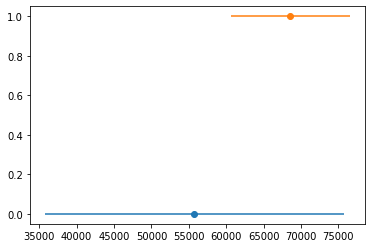

In [ ]:
plt.errorbar(x=CI1[1], y=0, xerr=CI1[3], fmt='o')
plt.errorbar(x=CI2[1], y=1, xerr=CI2[3], fmt='o')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

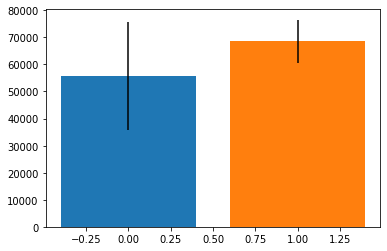

In [ ]:
# CI[1] equals lower_limit
# CI[3] equals upper_limit

plt.bar(x=0, height=CI1[1], yerr=CI1[3])
plt.bar(x=1, height=CI2[1], yerr=CI2[3])
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [ ]:
def confidence_interval_print(sample, confidence_level=.95):  # create a function to calculate a 95% confidence interval
  sample = np.array(sample)  # use a numpy array
  x_bar = np.mean(sample)  # calculate the sample mean
  st_dev = np.std(sample, ddof=1) # standard deviation
  n = len(sample)  # sample size
  t = stats.t.ppf(1-(1-confidence_level)/2, n-1)  # calculating the t-statistic

  std_error = st_dev / np.sqrt(n)  # calulate the standard error

  moe = t * std_error

  lower_limit = x_bar - moe
  upper_limit = x_bar + moe

  #return(lower_limit, x_bar, upper_limit, moe)
  print("lower_limit:" , lower_limit)
  print("x_bar:" , x_bar)  
  print("upper_limit:" , upper_limit)  
  print("margin_of_error:" , moe)


In [ ]:
df_cs = confidence_interval_print(df['ConvertedSalary'])

df_cs

lower_limit: 71299.82986224785
x_bar: 73453.40420137631
upper_limit: 75606.97854050477
margin_of_error: 2153.574339128457


Our estimates get much more precise due to using a larger sample size (n).

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

**Precision** is how close measurements of the same dataset are to each other versuses **accuracy** which refers to how close the measurement of the same dataset is to the target.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

It means that 95% of the estimates calculated from the samples will fall with the limits of the population mean.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.